In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
df.shape

(156, 9)

In [57]:
df.corr().style.background_gradient(cmap='Blues')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [59]:
df.describe().style.background_gradient(cmap='Reds')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Top 10 Countries in overall ranking

In [21]:
fig = px.bar(df.sort_values('Score',ascending=False)[:10].sort_values('Score') ,y='Country or region', color='Overall rank',
             x='Score', title='10 Most Happiest Countries',orientation='h',height=800)
fig.show()

## Last 10 countries in Overall Ranking

In [22]:
sort=df.sort_values('Score')[:10].sort_values('Score',ascending=False)
fig = px.bar( sort,y='Country or region', color='Overall rank',
             x='Score', title='10 least happiest Countries',height=800)
fig.show()

## Top 25 Countries in GDP

In [111]:
wealthy= df.sort_values('GDP per capita', ascending=False).head(10)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Country or region'],
                fill_color='#808080',
                align='center'),
    cells=dict(values=[wealthy['Country or region'].values],
               fill_color='#c7c7c7',
               align='center'))
])
fig.update_layout(title_text="Top 10 Countries in GDP per Capita")
fig.show()

In [5]:
fig=px.scatter(df, x='Score', y='Social support', hover_data=['Country or region'],
               trendline='ols',
               title='Happiness Score Vs  Social support (WHO) report 2019')
fig.add_annotation(x=5.653,y=0.886, text='pakistan',
                   showarrow=True, arrowcolor='#636363', 
                   bgcolor='#55fe9c',bordercolor='#c7c7c7')
coor=df['Score'].corr(df['Social support'])
print('Correlation of Score and Social Support:',coor )
fig.show()


Correlation of Score and Social Support: 0.7770577880638639


In [62]:
fig=px.scatter(df, x='Score', y='Healthy life expectancy', 
               hover_data=['Country or region'],
               title='Happiness Score Vs Healthy life expectancy (WHO) report 2019')
fig.add_annotation(x=5.653, y=0.535, text='Pakistan',
                   bgcolor='#55fe9c',bordercolor='#c7c7c7')
coor=df['Score'].corr(df['Healthy life expectancy'])
print('Correlation of Score and Social Support:',coor )
fig.show()

Correlation of Score and Social Support: 0.7798831492425831


In [73]:
fig=px.scatter(df, x='GDP per capita', y='Score', 
               hover_data=['Country or region'],
               title='Happiness Score Vs GDP (WHO) report 2019')
fig.add_annotation(y=5.653, x=0.677, text='Pakistan',
                   bgcolor='#55fe9c',bordercolor='#c7c7c7')
coor=df['Score'].corr(df['GDP per capita'])
print('Correlation of Happiness Score and GDP :',coor )
fig.show()

Correlation of Happiness Score and GDP : 0.7938828678781273


In [6]:
fig=px.scatter(df, x='Social support', y='Healthy life expectancy', 
               hover_data=['Country or region'],
               title='Social Support Vs Healthy life expectancy report 2019')
fig.add_annotation(x=0.886, y=0.535, text='pakistan',
                   bgcolor='#2ce4d6',bordercolor='#c7c7c7')
coor=df['Healthy life expectancy'].corr(df['Social support'])
print('Corelation of Social Support and Healthy life expactancy:',coor)
fig.show()

Corelation of Social Support and Healthy life expactancy: 0.7190094590308562


In [52]:

fig=px.scatter(df, x='GDP per capita', y='Healthy life expectancy', 
               hover_data=['Country or region'],
               title='GDP per capita Vs Healthy life expectancy (WHO) report 2019')
fig.add_annotation(x=0.677, y=0.535, text='pakistan',
                   bgcolor='#2ce4d6',bordercolor='#c7c7c7')
coor=df['Healthy life expectancy'].corr(df['GDP per capita'])
print('GDP per capita of Healthy life expectancy:',coor)
fig.show()

GDP per capita of Healthy life expectancy: 0.8354621150416077


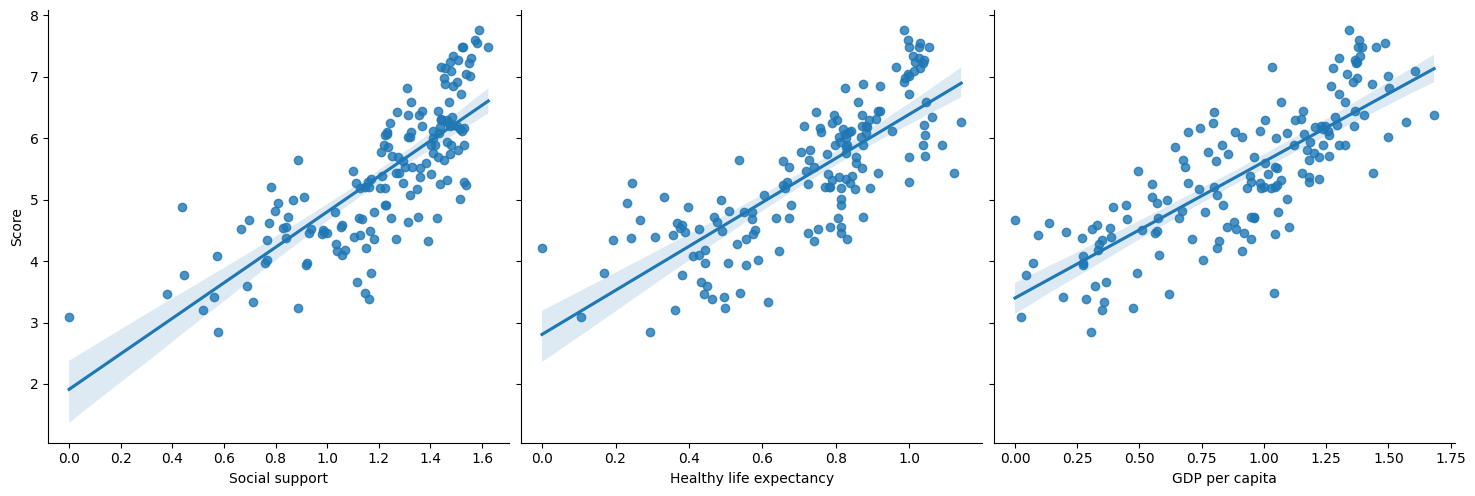

In [81]:
sns.pairplot(df, x_vars=['Social support','Healthy life expectancy','GDP per capita'], y_vars='Score',kind='reg', height=5)
plt.show()

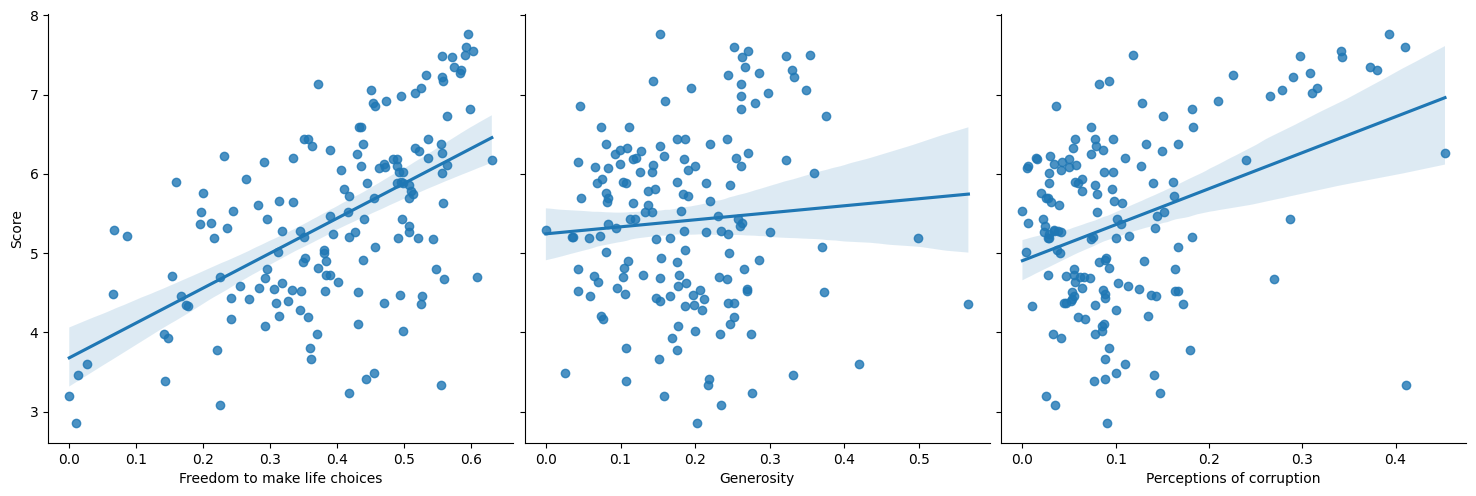

In [84]:
sns.pairplot(df, x_vars=['Freedom to make life choices','Generosity','Perceptions of corruption'], y_vars='Score',kind='reg', height=5)
plt.show()

<AxesSubplot:>

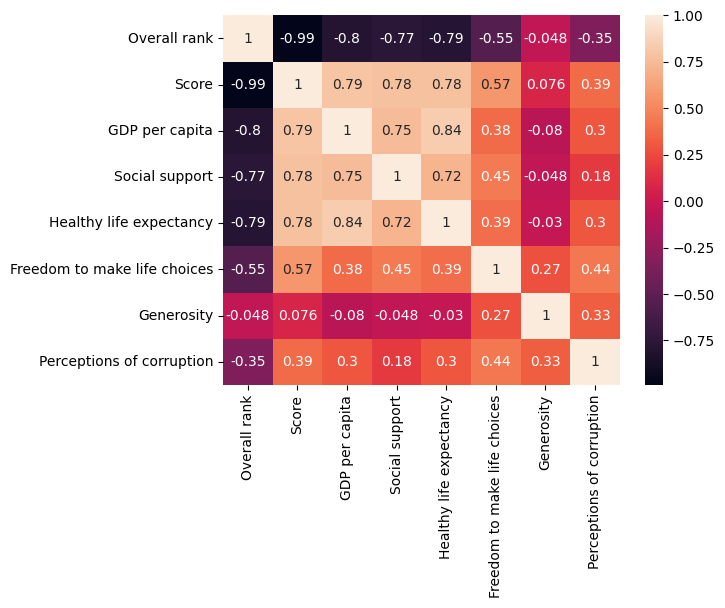

In [83]:
sns.heatmap(df.corr(), annot=True)

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



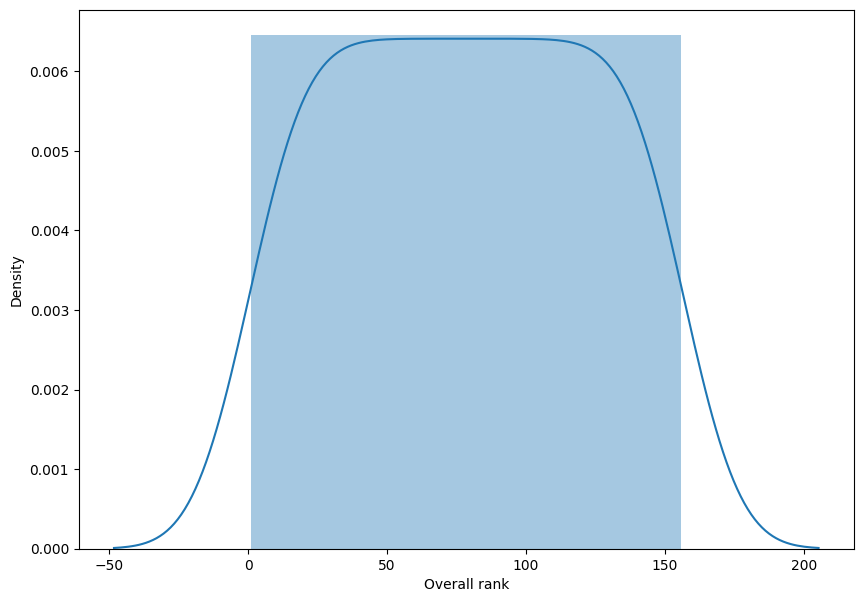

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



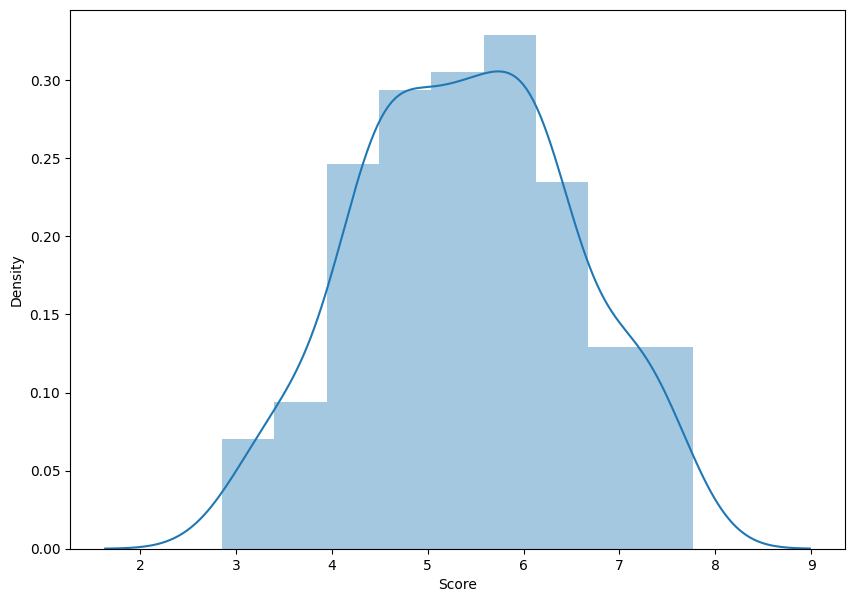

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



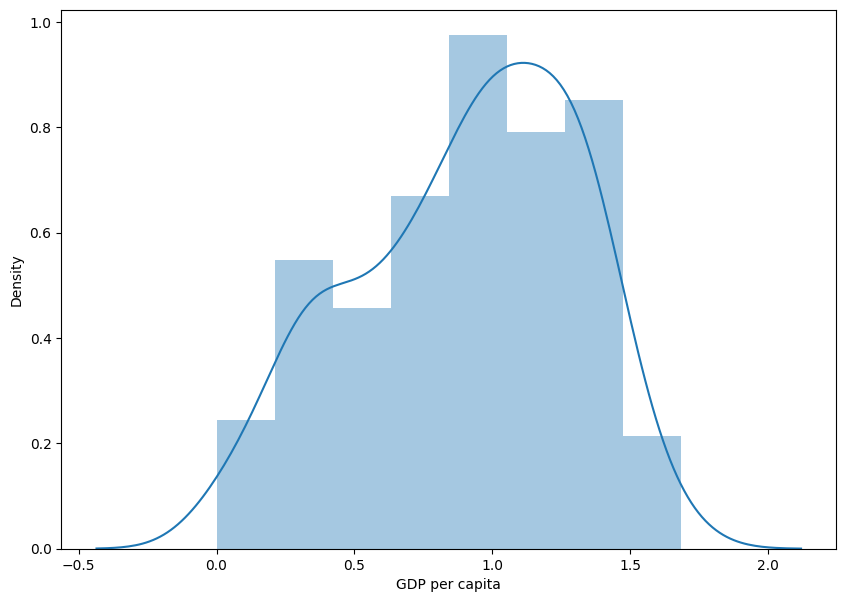

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



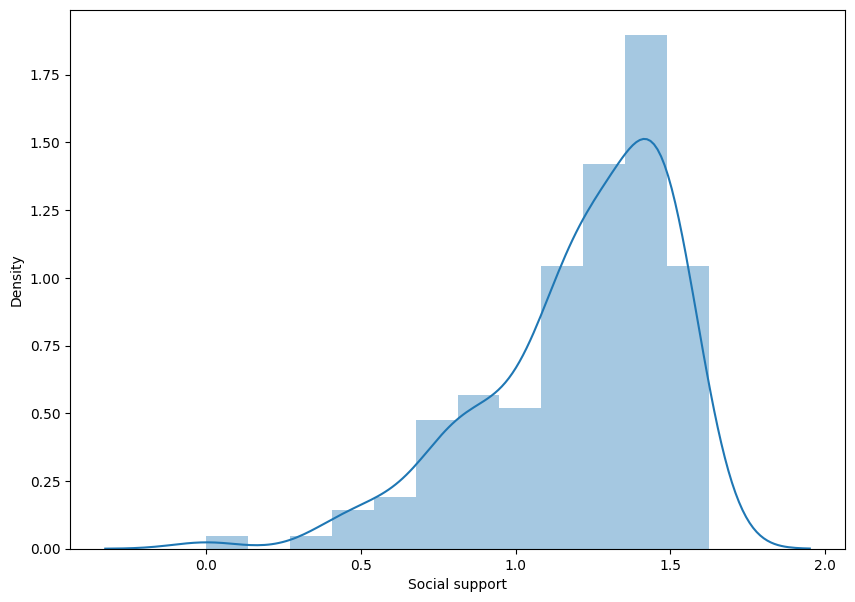

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



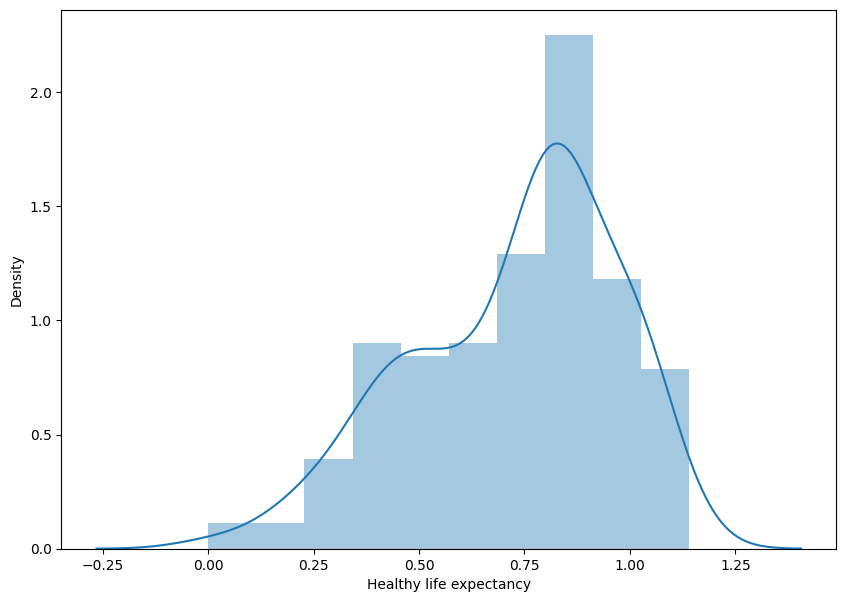

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



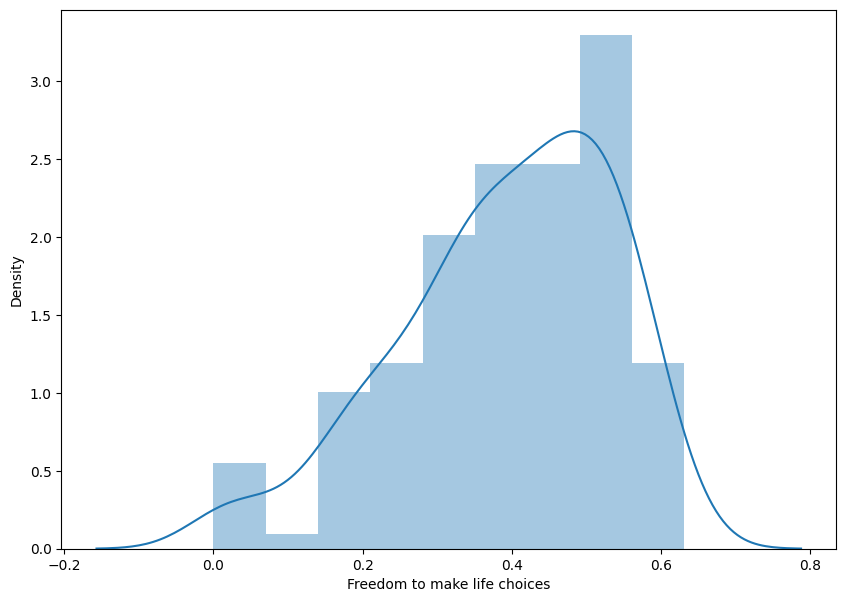

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



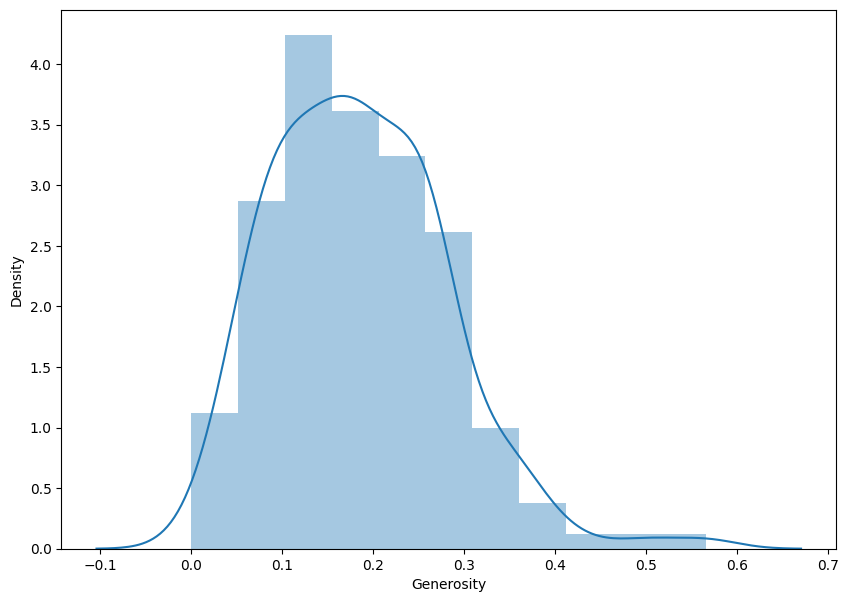

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



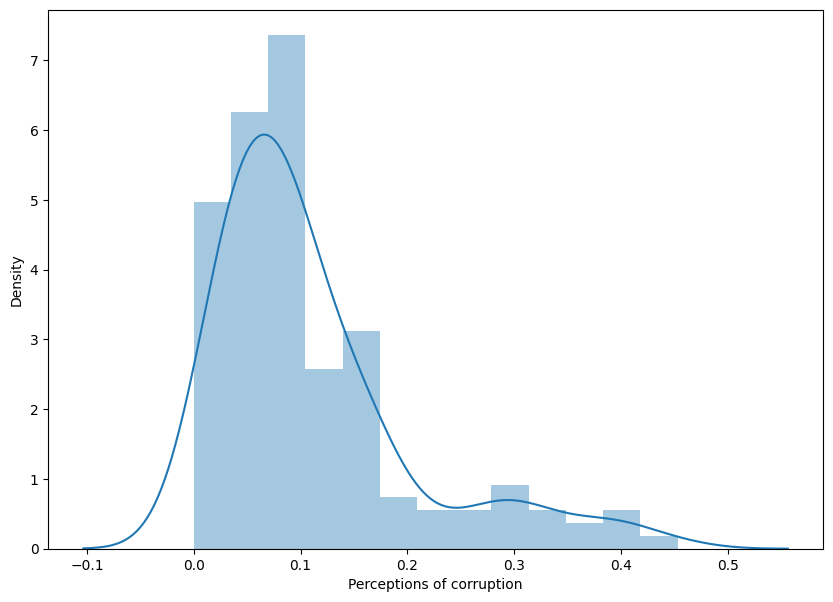

In [64]:
plot_var=df.select_dtypes(include=[np.number])
def hist_plot(plot_var,var):
    plt.figure(figsize=(10,7))
    sns.distplot(df[var])
    plt.show()
for var in plot_var:
    hist_plot(df,var)

# Modeling

In [65]:
X=df.iloc[:,3:] # All columns except first 3
y=df.iloc[:, 2] # Only second column

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=8 )
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
model.intercept_

1.8485428173497356

In [69]:
model.coef_

array([0.80191986, 1.1977969 , 1.00075448, 1.32355556, 0.3321546 ,
       0.56642857])

In [70]:
model.score(X_test, y_test)

0.8105905844704792

In [71]:
yhat=model.predict(X_test)

In [72]:
diff=pd.DataFrame({'Actual': y_test, 
                   'Predicted': yhat, 
                   'Difference': y_test-yhat})
diff[:4]

,Actual,Predicted,Difference
3,7.494,6.893831,0.600169
23,6.592,6.436826,0.155174
57,5.886,6.392386,-0.506386
4,7.488,6.803793,0.684207


c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



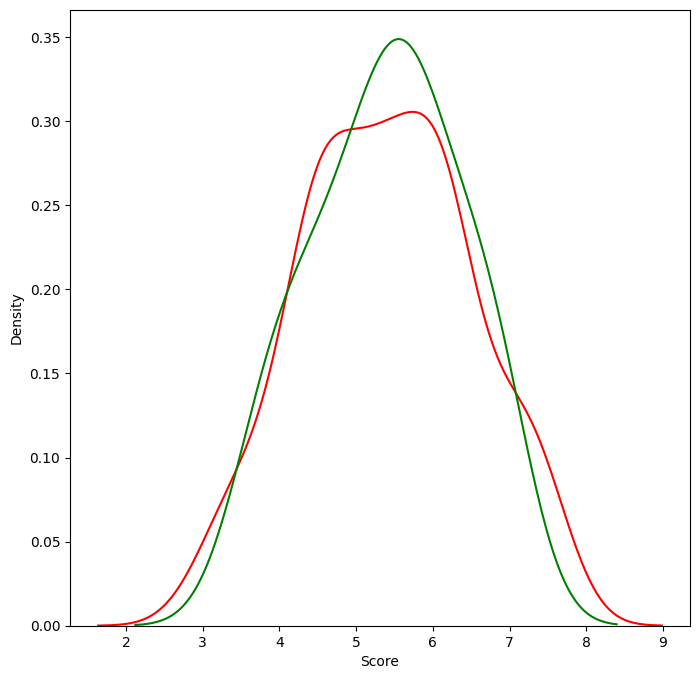

In [75]:
plt.figure(figsize=(8,8))
sns.distplot(df['Score'], color='r', hist=False, label='Actual values')
sns.distplot(yhat, color='g', hist=False, label='Predicted Values')
plt.show()